# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [27]:
df = pd.read_csv("breast-cancer-wisconsin-data.csv")
df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [0]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [6]:
print(df.dtypes)

print(df.shape)

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object
(699, 11)


In [7]:
df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [29]:
# We could see "?" values in column, this should be removed from data set
print(df['Bare Nuclei'].loc[df['Bare Nuclei'] == '?'].count())
# Check for missing value in any other column
df.isna().sum()

16


ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [30]:
# No missing values found. So let us try to remove ? from bare nuclei column
df = df.replace('?', np.nan)
df = df.apply(lambda x: x.fillna(x.median()),axis=0)  
# Get count of rows having ?
print(df['Bare Nuclei'].loc[df['Bare Nuclei'] == '?'].count())

0


In [35]:
#Drop the ID Column
df = df.drop(['ID'], axis=1)
#Convert Bare Nuclei Column to float
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null float64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


# Q4. Perform bi variate analysis including correlation & pairplots. 


In [0]:
# Check for correlation of variable

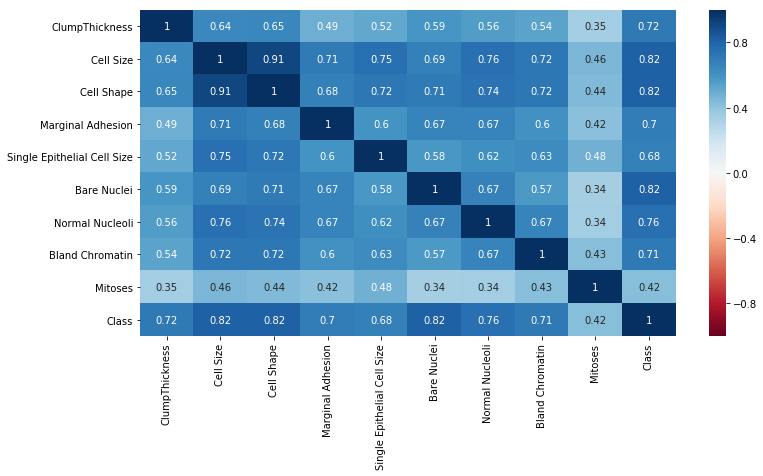

In [37]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

plt.figure(figsize=(12,6))

sns.heatmap(df.corr(),cmap='RdBu', annot=True, vmin=-1, vmax=1)

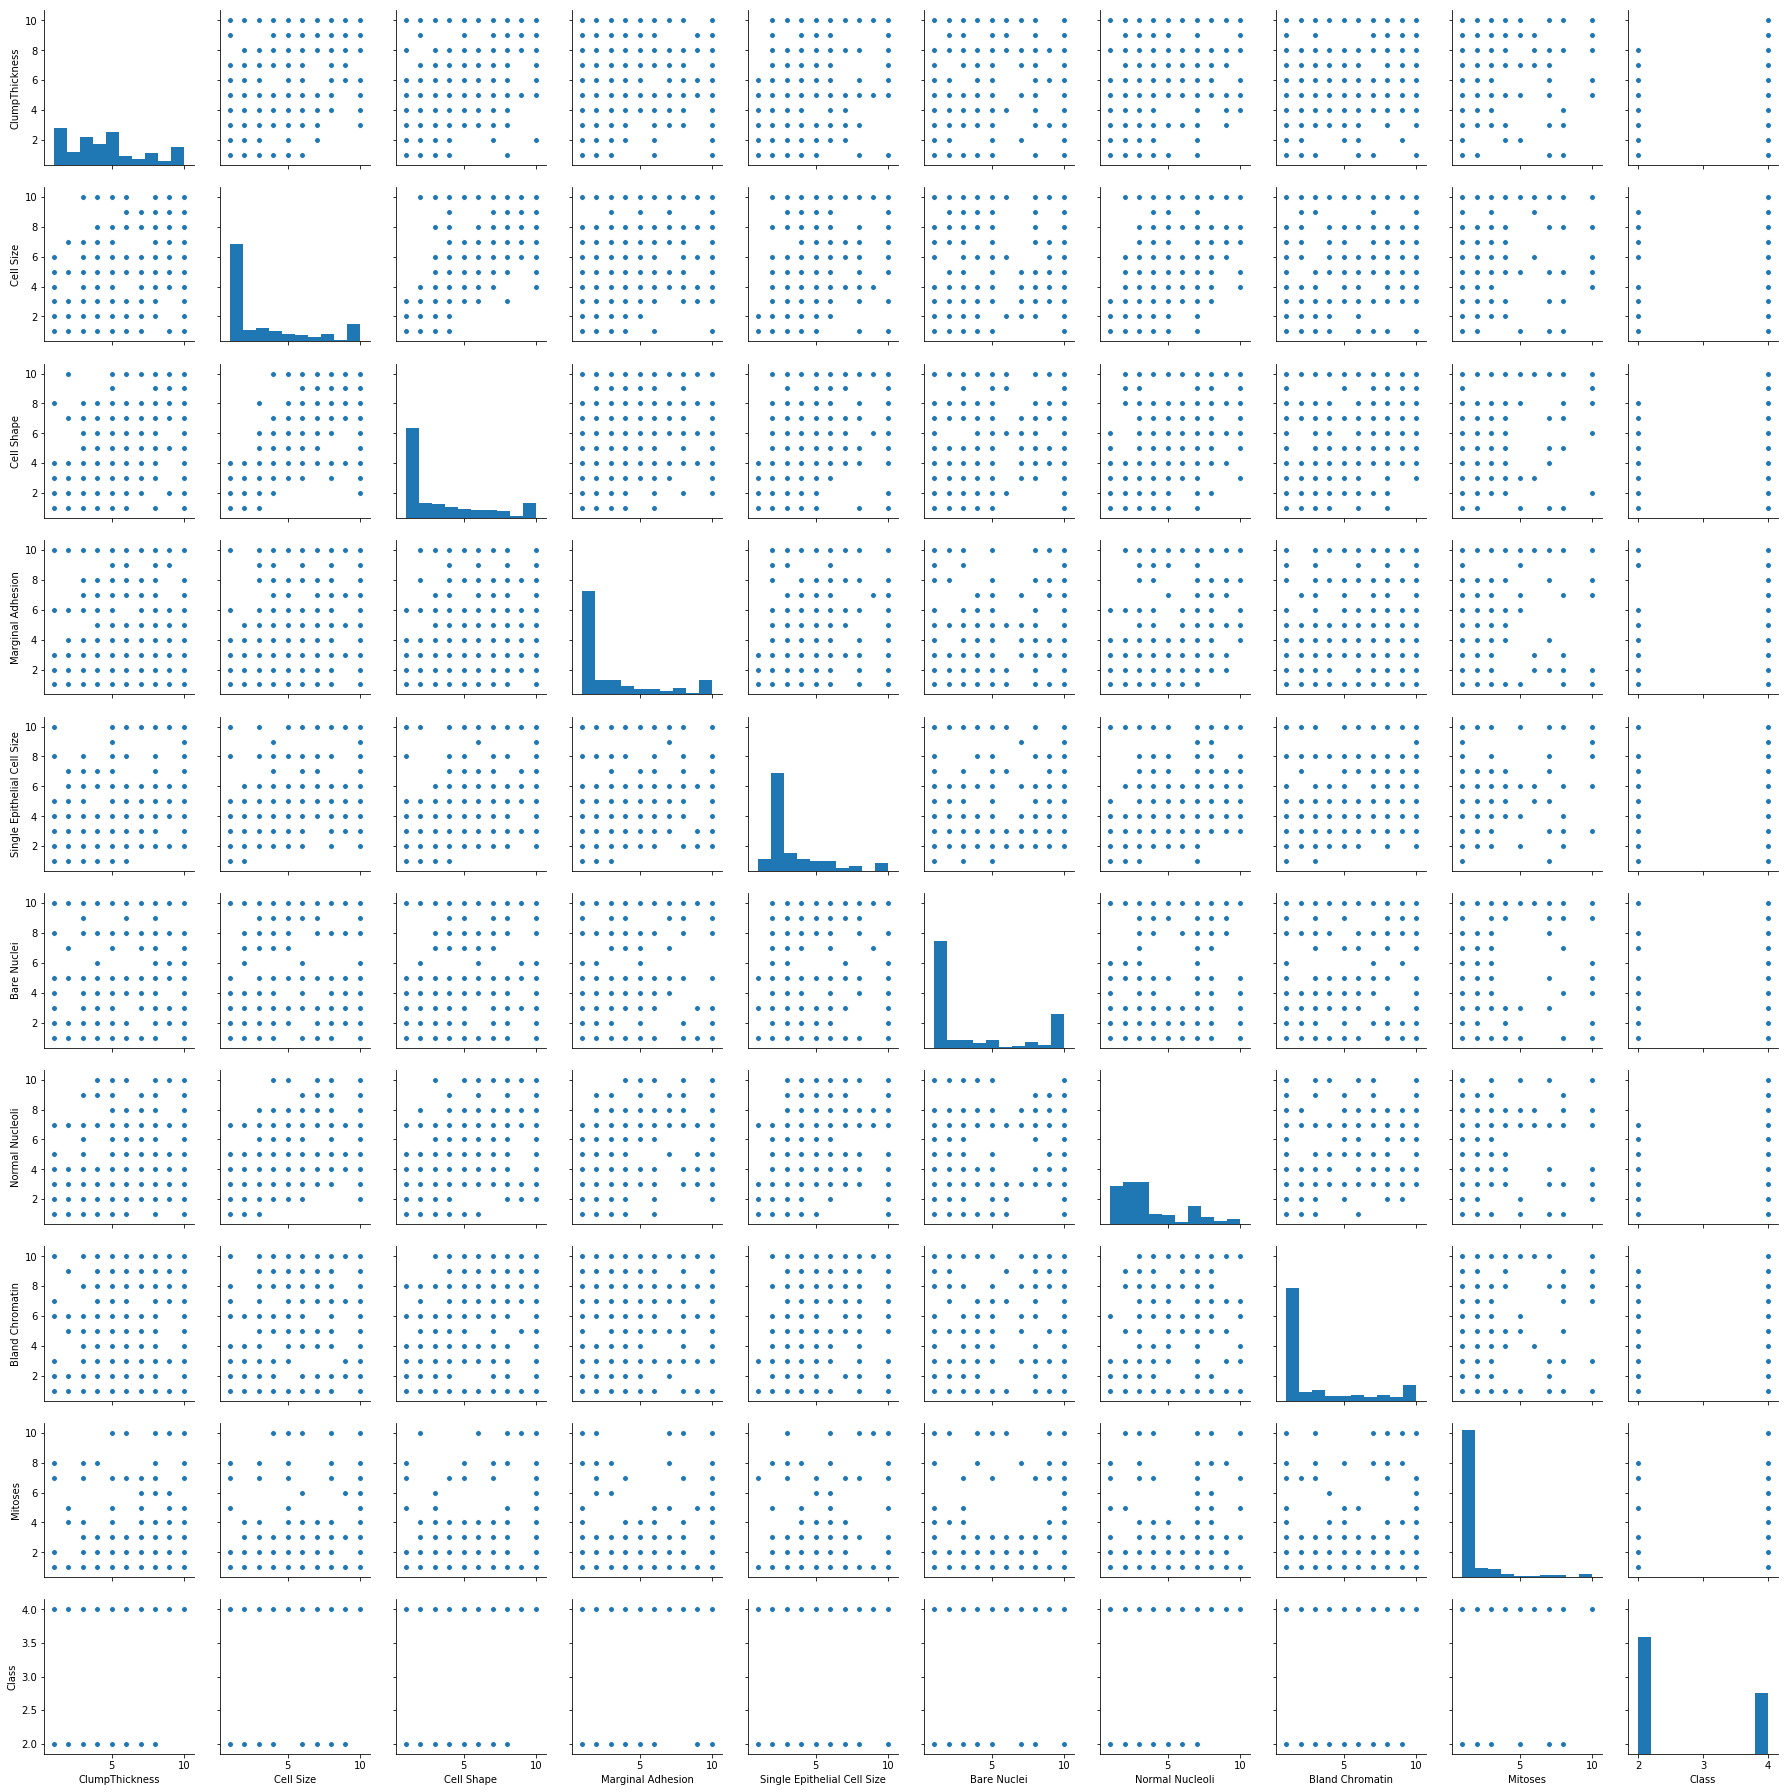

In [39]:
#Let us check for pair plots
sns.pairplot(df)

# Q5 Remove any unwanted columns or outliers, standardize variables in this pre-processing step

In [0]:
# We could see most of the outliers are now removed.

In [0]:
# The ID column has already been dropped in previous steps

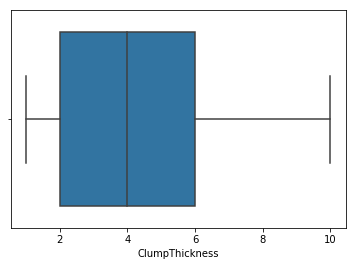

In [43]:
sns.boxplot(df.iloc[:,0])

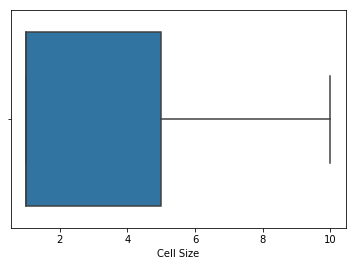

In [45]:
sns.boxplot(df.iloc[:,1])

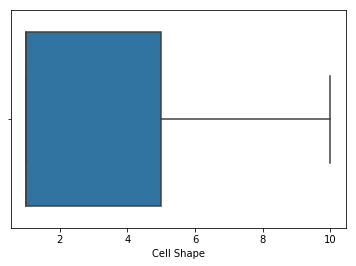

In [46]:
sns.boxplot(df.iloc[:,2])

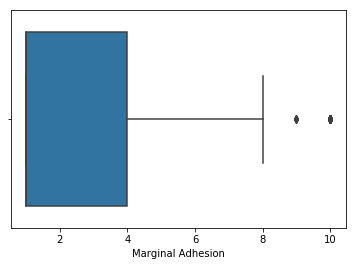

In [48]:
sns.boxplot(df.iloc[:,3])

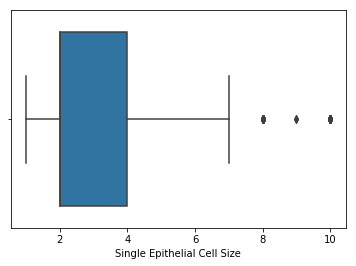

In [49]:
sns.boxplot(df.iloc[:,4])

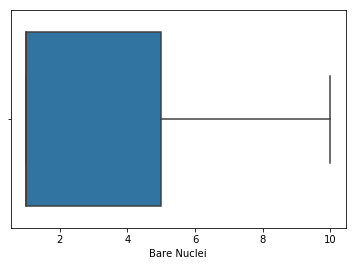

In [50]:
sns.boxplot(df.iloc[:,5])

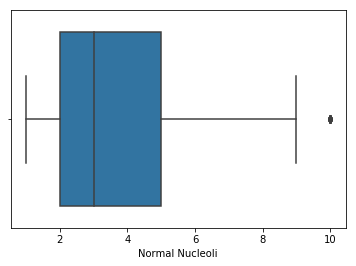

In [52]:
sns.boxplot(df.iloc[:,6])

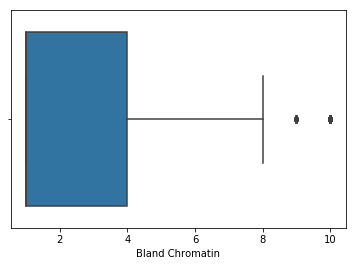

In [54]:
sns.boxplot(df.iloc[:,7])

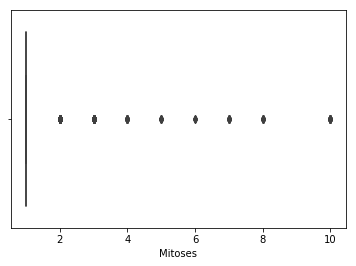

In [55]:
sns.boxplot(df.iloc[:,8])

In [0]:
# Standardizing variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_std = sc.fit_transform(df)

# Q6 Create a covariance matrix for identifying Principal components

In [0]:
# PCA
# Step 1 - Create covariance matrix


In [56]:
cov_matrix = np.cov(df_std.T)
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[1.00143266 0.64583645 0.65552689 0.48705303 0.52256381 0.5908535
  0.5592282  0.53660222 0.35053534 0.71702715]
 [0.64583645 1.00143266 0.90818117 0.70659267 0.75287621 0.68765657
  0.75680368 0.72390044 0.4593503  0.81907552]
 [0.65552689 0.90818117 1.00143266 0.68405782 0.72069948 0.70848734
  0.73700282 0.72047704 0.43953974 0.820107  ]
 [0.48705303 0.70659267 0.68405782 1.00143266 0.60045809 0.66792658
  0.66767051 0.60421681 0.41823111 0.69779849]
 [0.52256381 0.75287621 0.72069948 0.60045809 1.00143266 0.5845377
  0.61698451 0.62978166 0.47978787 0.68376273]
 [0.5908535  0.68765657 0.70848734 0.66792658 0.5845377  1.00143266
  0.67518063 0.5756016  0.34288766 0.82014124]
 [0.5592282  0.75680368 0.73700282 0.66767051 0.61698451 0.67518063
  1.00143266 0.66683179 0.34466258 0.75770012]
 [0.53660222 0.72390044 0.72047704 0.60421681 0.62978166 0.5756016
  0.66683179 1.00143266 0.42894941 0.71326403]
 [0.35053534 0.4593503  0.43953974 0.41823111 0.47978787 0.3428

# Q7 Identify eigen values and eigen vector

In [0]:
# Step 2- Get eigen values and eigen vector

In [58]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.86482867e-01 -1.53780587e-01  8.19948678e-01 -1.93537912e-02
  -1.65922965e-01 -4.61058785e-02  5.69495446e-02 -2.43129182e-01
   3.52570674e-01 -7.26042747e-02]
 [-3.55778408e-01 -1.61465406e-02 -6.50741903e-02 -7.40430469e-01
  -4.01924327e-04 -2.22911943e-01 -1.39409782e-01  4.50063303e-01
   1.51365691e-01  1.61541178e-01]
 [-3.52927539e-01 -5.49545490e-02 -1.02133723e-02  6.48405184e-01
  -1.98081731e-01 -2.00817488e-01 -1.06583143e-01  5.84436739e-01
   7.36978525e-02  1.18181541e-01]
 [-3.09682474e-01 -8.63368905e-03 -4.09371880e-01  4.63478603e-02
   1.93963223e-02  4.69881739e-01  2.09498895e-02 -9.24327656e-02
   6.38821338e-01 -3.09916575e-01]
 [-3.11685681e-01  1.98540206e-01 -1.52492504e-01  6.56015232e-02
  -1.44016509e-02 -3.67092365e-01 -6.77581126e-01 -4.55359042e-01
  -9.99685292e-02 -1.56366046e-01]
 [-3.17155278e-01 -2.47988578e-01  3.94605610e-02 -1.12128053e-01
  -4.07592475e-01  5.32423724e-01 -1.28628247e-01  3.73420635e-02
  -5.73504501e-

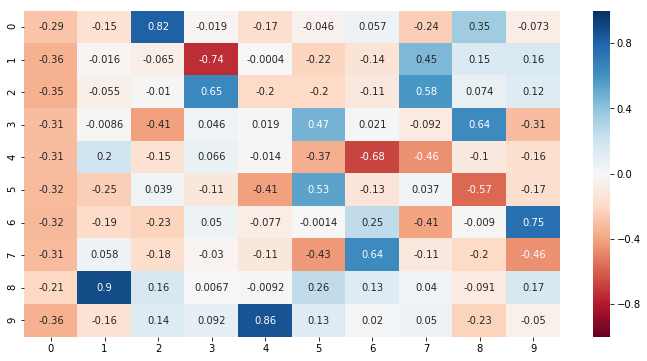

In [60]:
#Heat Map
plt.figure(figsize=(12,6))
sns.heatmap(eig_vecs,annot=True,vmin=-1,vmax=1,cmap='RdBu')

# Q8 Find variance and cumulative variance by each eigen vector

In [61]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance Explained", var_exp)

Variance Explained [67.15108898576578, 7.919870625298992, 5.474425291182363, 4.726836653750172, 3.8059225679824698, 3.1523288073766884, 2.9715341836905234, 2.625277055181726, 1.288968613516338, 0.8837472162549397]


In [62]:
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 67.15108899  75.07095961  80.5453849   85.27222156  89.07814412
  92.23047293  95.20200712  97.82728417  99.11625278 100.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [104]:
from sklearn.decomposition import PCA
from factor_analyzer import Rotator,FactorAnalyzer

In [105]:
pcamodel = PCA(4)
pcamodel.fit(df_std)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [106]:
print(pcamodel.components_)  

[[ 0.28648287  0.35577841  0.35292754  0.30968247  0.31168568  0.31715528
   0.32377844  0.31292865  0.21022101  0.35525072]
 [-0.15378059 -0.01614654 -0.05495455 -0.00863369  0.19854021 -0.24798858
  -0.19401019  0.05753435  0.89823671 -0.15588581]
 [ 0.81994868 -0.06507419 -0.01021337 -0.40937188 -0.1524925   0.03946056
  -0.23106396 -0.17684196  0.16469144  0.13842638]
 [ 0.04610588  0.22291194  0.20081749 -0.46988174  0.36709236 -0.53242372
   0.00142836  0.43182875 -0.257723   -0.12624152]]


In [107]:
var = pcamodel.explained_variance_ratio_

var

array([0.67151089, 0.07919871, 0.05474425, 0.04726837])

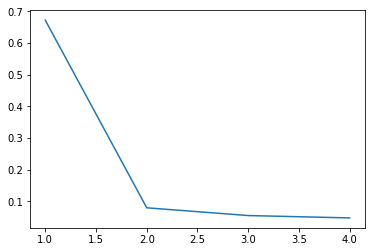

In [109]:
plt.plot([1,2,3,4], var)

# Q10 Find correlation between components and features

In [110]:
df_comp = pd.DataFrame(pcamodel.components_,columns=df.columns.values)

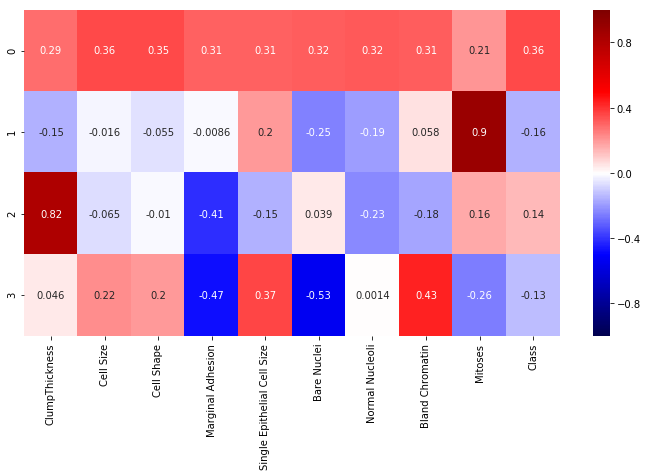

In [111]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='seismic', annot=True, vmin=-1,vmax=1)

In [ ]:
#ClumpThickness and Mitoses can highly correlated
#Single Epithelial Cell Size and Blank Chromatin are correlated.